In [1]:
#Problem Statement: Predict whether a country is poor based on World Bank household survey data for countries
#A, B and C - http://drivendata.co/blog/worldbank-poverty-benchmark/

#import libraries: dataframe manipulation, machine learning, os tools
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import os
import csv
import matplotlib.pylab as plt
import scipy.stats as stats
import sklearn

In [2]:
#A-training data has 342 features, 3703 poor = True, 4500 poor=False
Atrain = pd.read_csv("A_hhold_train.csv")

In [3]:
#B training has 440 features with poor = T 251 instances and poor =F 3004 instances
Btrain = pd.read_csv("B_hhold_train.csv")

In [4]:
#C training has 163 features with poor = T 973 instances and poor =F 5496 instances
Ctrain = pd.read_csv("C_hhold_train.csv")

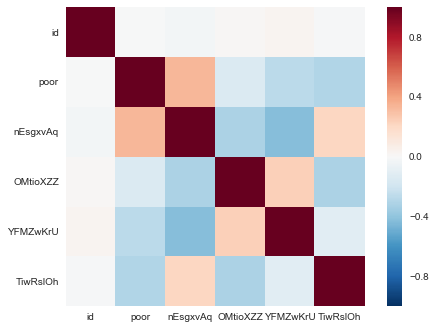

In [5]:
#Country A - encode the categorical features as numbers to try to figure out which 
#features most influence classification of poor or not.

#Let's explore the correlation between the different features in the columns.
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(Atrain):
    result = Atrain.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Plot the correlation between features as a heatmap
encoded_data, _ = number_encode_features(Atrain)
sns.heatmap(Atrain.corr(), square=True)
plt.show()

#Dimensionality reduction from 343 features to 4 features would be 'nEsgxvAq', 'OmtioXZZ', 'YFMZwKrU' and 'TrwRslOh'
#However, let's not throw away any features just yet.

#From the correlation plot, it appears that 'nEsgxvAq' is highly positively correlated (0.4) with 'poor'
#'OmtioXZZ' is slightly negatively correlated (-0.2), 'YFMZwKrU' is slightly more negatively correlated (-0.3),
# and 'TrwRslOh' is negatively correlated (-0.35).

In [ ]:
#Preprocess the data for country A - convert object types to categoricals
# Standardize features
def standardize(Atrain, numeric_only=True):
    numeric = Atrain.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    Atrain[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return Atrain
    
def pre_process_data(Atrain, enforce_cols=None):
    print("Input shape:\t{}".format(Atrain.shape))
        
    df = standardize(Atrain)
    print("After standardization {}".format(Atrain.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(Atrain)
    print("After converting categoricals:\t{}".format(Atrain.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(Atrain.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, Atrain.columns)

        Atrain.drop(to_drop, axis=1, inplace=True)
        df = Atrain.assign(**{c: 0 for c in to_add})
    
    Atrain.fillna(0, inplace=True)
    
    return df

In [6]:
print("Country A")
aX_train = pre_process_data(Atrain.drop('poor', axis=1))
ay_train = np.ravel(Atrain.poor)

Country A
Input shape:	(8203, 345)
After standardization (8203, 345)
After converting categoricals:	(8203, 345)


In [8]:
aX_train.head()

,id,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,country_A,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,...,JCDeZBXq_LPtkN,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq
0,-0.123796,-1.447160,0.325746,1.099716,-0.628045,1,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1.148155,-0.414625,-0.503468,-0.016050,0.713467,1,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
2,1.693262,0.617910,-0.503468,-0.016050,0.713467,1,0,1,0,1,...,0,1,0,1,0,1,1,0,1,0
3,1.635970,0.617910,-0.503468,-0.016050,0.266296,1,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
4,0.000822,-0.414625,1.154960,1.099716,0.713467,1,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1


In [8]:
#TEST DATA - HOUSEHOLD SURVEYS is same as training data ,
#except the poor column is not included

Atest = pd.read_csv("A_hhold_test.csv")

In [9]:
Btest = pd.read_csv("B_hhold_test.csv")

In [10]:
Ctest = pd.read_csv("C_hhold_test.csv")

In [11]:
#Preprocess the data for country A test data - convert object types to categoricals
# Standardize features
def standardize(result, numeric_only=True):
    numeric = result.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    Atest[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result
    

def pre_process_data(result, enforce_cols=None):
    print("Input shape:\t{}".format(result.shape))
        

    df = standardize(result)
    print("After standardization {}".format(result.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result)
    print("After converting categoricals:\t{}".format(result.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result.columns)

        result.drop(to_drop, axis=1, inplace=True)
        df = result.assign(**{c: 0 for c in to_add})
    
    result.fillna(0, inplace=True)
    
    return df
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(Atest):
    result2 = result.copy()
    encoders = {}
    for column in result2.columns:
        if result2.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result2[column] = encoders[column].fit_transform(result[column])
    return result, encoders

def standardize(result2, numeric_only=True):
    numeric = result2.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    result2[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result2
    

def pre_process_data(result2, enforce_cols=None):
    print("Input shape:\t{}".format(result2.shape))
        

    df = standardize(result2)
    print("After standardization {}".format(result2.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result2)
    print("After converting categoricals:\t{}".format(result2.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result2.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result2.columns)

        result2.drop(to_drop, axis=1, inplace=True)
        df = result2.assign(**{c: 0 for c in to_add})
    
    result2.fillna(0, inplace=True)
    
    return df

In [12]:
#Preprocess the data for country B test data - convert object types to categoricals
# Standardize features
def standardize(result, numeric_only=True):
    numeric = result.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    Btest[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result
    

def pre_process_data(result, enforce_cols=None):
    print("Input shape:\t{}".format(result.shape))
        

    df = standardize(result)
    print("After standardization {}".format(result.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result)
    print("After converting categoricals:\t{}".format(result.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result.columns)

        result.drop(to_drop, axis=1, inplace=True)
        df = result.assign(**{c: 0 for c in to_add})
    
    result.fillna(0, inplace=True)
    
    return df
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(Btest):
    result2 = result.copy()
    encoders = {}
    for column in result2.columns:
        if result2.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result2[column] = encoders[column].fit_transform(result[column])
    return result, encoders

def standardize(result2, numeric_only=True):
    numeric = result2.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    result2[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result2
    

def pre_process_data(result2, enforce_cols=None):
    print("Input shape:\t{}".format(result2.shape))
        

    df = standardize(result2)
    print("After standardization {}".format(result2.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result2)
    print("After converting categoricals:\t{}".format(result2.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result2.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result2.columns)

        result2.drop(to_drop, axis=1, inplace=True)
        df = result2.assign(**{c: 0 for c in to_add})
    
    result2.fillna(0, inplace=True)
    
    return df

In [13]:
#Preprocess the data for country C test data - convert object types to categoricals
# Standardize features
def standardize(result, numeric_only=True):
    numeric = result.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    Ctest[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result
    

def pre_process_data(result, enforce_cols=None):
    print("Input shape:\t{}".format(result.shape))
        

    df = standardize(result)
    print("After standardization {}".format(result.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result)
    print("After converting categoricals:\t{}".format(result.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result.columns)

        result.drop(to_drop, axis=1, inplace=True)
        df = result.assign(**{c: 0 for c in to_add})
    
    result.fillna(0, inplace=True)
    
    return df
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(Ctest):
    result2 = result.copy()
    encoders = {}
    for column in result2.columns:
        if result2.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result2[column] = encoders[column].fit_transform(result[column])
    return result, encoders

def standardize(result2, numeric_only=True):
    numeric = result2.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    result2[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return result2
    

def pre_process_data(result2, enforce_cols=None):
    print("Input shape:\t{}".format(result2.shape))
        

    df = standardize(result2)
    print("After standardization {}".format(result2.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(result2)
    print("After converting categoricals:\t{}".format(result2.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(result2.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, result2.columns)

        result2.drop(to_drop, axis=1, inplace=True)
        df = result2.assign(**{c: 0 for c in to_add})
    
    result2.fillna(0, inplace=True)
    
    return df

In [14]:
#Country A
#Import necessary libraries
import sklearn.cross_validation as cross_validation

#Define y_train and y_test variables
X_atrain, X_atest, y_atrain, y_atest = cross_validation.train_test_split(encoded_data[encoded_data.columns - ['poor']], 
    encoded_data["poor"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_atrain = pd.DataFrame(scaler.fit_transform(X_atrain.astype("float64")), columns=X_atrain.columns)
X_atest = scaler.transform(X_atest.astype("float64"))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [15]:
#Country B
#Import necessary libraries
import sklearn.cross_validation as cross_validation

#Define y_train and y_test variables
X_btrain, X_btest, y_btrain, y_btest = cross_validation.train_test_split(encoded_data[encoded_data.columns - ['poor']], 
    encoded_data["poor"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_btrain = pd.DataFrame(scaler.fit_transform(X_btrain.astype("float64")), columns=X_btrain.columns)
X_btest = scaler.transform(X_btest.astype("float64"))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [16]:
#Country C
#Import necessary libraries
import sklearn.cross_validation as cross_validation

#Define all variables for Country C
X_ctrain, X_ctest, y_ctrain, y_ctest = cross_validation.train_test_split(encoded_data[encoded_data.columns - ['poor']], 
    encoded_data["poor"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_ctrain = pd.DataFrame(scaler.fit_transform(X_ctrain.astype("float64")), columns=X_ctrain.columns)
X_ctest = scaler.transform(X_ctest.astype("float64"))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [17]:
#Let's try a multiperceptron neural network on Country A training data
from sklearn.neural_network import MLPClassifier
#Create MLP model with 342 neurons and 4 layers. 
#Chose 342 since that's the number of features.
#Do we need this many neurons for a low mean log loss?
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(342,342,342,342,342), random_state=1,max_iter=1500)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(342, 342, 342, 342, 342),
       learning_rate='constant', learning_rate_init=0.001, max_iter=1500,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
predictions = mlpatrain.predict(X_atrain)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_atrain,predictions))
print(classification_report(y_atrain,predictions))

[[3636    0]
 [   0 2926]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      3636
       True       1.00      1.00      1.00      2926

avg / total       1.00      1.00      1.00      6562



In [19]:
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

#Baseline mean log loss = 0.5739 so this is almost perfect!

Country A training log loss: 9.99200722163e-16


In [20]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 342 neurons and 4 layers. 
#Chose 342 since that's the number of features.

#Let's try a different solver
mlpatrain= MLPClassifier(solver='adam', hidden_layer_sizes=(342,342,342,342,342), random_state=1,max_iter=1500)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 0.063162284962


In [27]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 4 neurons and 10 hidden layers. 
#Chose 342 since that's the number of features.

#Let's try a different solver
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,4,4,4,4,4,4,4,4,4,4), random_state=1,max_iter=1500)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 1.98962994958


In [32]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 10 neurons and 3 hidden layers. 
#Chose 342 since that's the number of features.

#Choosing number of neurons between 1 and the number of input variables.
#Number of layers is 3 (http://www.heatonresearch.com/node/707 for supporting rationale and
#Blum, A. (1992), Neural Networks in C++, NY: Wiley. )
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10,10,10), random_state=1,max_iter=1500,tol=1e-4)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 0.0105270271849


In [33]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 7 neurons and 3 hidden layers. 
#Chose 342 since that's the number of features.

#Choosing number of neurons between 1 and the number of input variables.
#Number of layers is 3 (http://www.heatonresearch.com/node/707 for supporting rationale and
#Blum, A. (1992), Neural Networks in C++, NY: Wiley. )
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,7,7), random_state=1,max_iter=1500,tol=1e-4)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 0.0315814471128


In [34]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 7 neurons and 3 hidden layers. 
#Chose 342 since that's the number of features.

#Choosing number of neurons between 1 and the number of input variables.
#Number of layers is 3 (http://www.heatonresearch.com/node/707 for supporting rationale and
#Blum, A. (1992), Neural Networks in C++, NY: Wiley. )
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,7,7,7,7), random_state=1,max_iter=1500,tol=1e-4)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 0.152643539192


In [35]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 5 neurons and 3 hidden layers. 
#Chose 342 since that's the number of features.

#Choosing number of neurons between 1 and the number of input variables.
#Number of layers is 3 (http://www.heatonresearch.com/node/707 for supporting rationale and
#Blum, A. (1992), Neural Networks in C++, NY: Wiley. )
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,5,5), random_state=1,max_iter=1500,tol=1e-4)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 1.33693464583


In [31]:
from sklearn.neural_network import MLPClassifier
#Create MLP model with 5 neurons and 3 hidden layers. 
#Chose 342 since that's the number of features.

#Let's try a different solver
mlpatrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15,15,15), random_state=1,max_iter=1500)
#Fit training data to model
mlpatrain.fit(X_atrain,y_atrain)
from sklearn.metrics import log_loss
print("Country A training log loss:", log_loss(y_atrain, mlpatrain.predict(X_atrain)))

Country A training log loss: 0.0105269053322


In [24]:
#Let's try a multiperceptron neural network on Country A test data
from sklearn.neural_network import MLPClassifier
#Create MLP model with 342 neurons and 4 layers. (#features/3)
mlpatest= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(342,342,342,342,342), random_state=1,max_iter=1500)
#Fit training data to model
mlpatest.fit(X_atest,y_atest)

predictions = mlpatest.predict(X_atest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_atest,predictions))
print(classification_report(y_atest,predictions))

[[901   0]
 [  0 740]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00       901
       True       1.00      1.00      1.00       740

avg / total       1.00      1.00      1.00      1641



In [26]:
from sklearn.metrics import log_loss
print("Country A test log loss:", log_loss(y_atest, mlpatest.predict(X_atest)))

#Baseline mean log loss = 0.5739 so the A test results are much worse than the training

Country A test log loss: 9.99200722163e-16


In [68]:
#Country B training data Multi-layer perceptron
from sklearn.neural_network import MLPClassifier
#Create MLP model with 440 neurons  (country B has 440 features) and 4 layers. (#features/3)
mlpbtrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(440,440,440,440), random_state=1,max_iter=500)
#Fit training data to model
mlpbtrain.fit(X_btrain,y_btrain)
predictions = mlpbtrain.predict(X_btrain)

#Get the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_btrain,predictions))
print(classification_report(y_btrain,predictions))

[[3586    0]
 [   0 2976]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      3586
       True       1.00      1.00      1.00      2976

avg / total       1.00      1.00      1.00      6562



In [69]:
from sklearn.metrics import log_loss
print("Country B training log loss:", log_loss(y_btrain, mlpbtrain.predict(X_btrain)))

Country B training log loss: 9.99200722163e-16


In [78]:
#Country B test data Multi-layer perceptron
from sklearn.neural_network import MLPClassifier
#Create MLP model with 440 neurons  (country B has 440 features) and 4 layers. (#features/3)
mlpbtest= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(440,440,440,440), random_state=1,max_iter=500)
#Fit training data to model
mlpbtest.fit(X_btest,y_btest)
predictions = mlpbtest.predict(X_btest)

#Get the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_btest,predictions))
print(classification_report(y_btest,predictions))

[[914   0]
 [  0 727]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00       914
       True       1.00      1.00      1.00       727

avg / total       1.00      1.00      1.00      1641



In [79]:
from sklearn.metrics import log_loss
print("Country B test log loss:", log_loss(y_btest, mlpbtest.predict(X_btest)))

Country B test log loss: 9.99200722163e-16


In [71]:
#Country C training data Multi-layer perceptron
from sklearn.neural_network import MLPClassifier
#Create MLP model with 163 neurons  (country C has 163 features) and 4 layers. (#features/3)
mlpctrain= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(163,163,163,163), random_state=1,max_iter=500)
#Fit training data to model
mlpctrain.fit(X_ctrain,y_ctrain)
predictions = mlpctrain.predict(X_ctrain)

#Get the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_ctrain,predictions))
print(classification_report(y_ctrain,predictions))

[[3595    0]
 [   0 2967]]
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      3595
       True       1.00      1.00      1.00      2967

avg / total       1.00      1.00      1.00      6562



In [72]:
from sklearn.metrics import log_loss
print("Country C training log loss:", log_loss(y_ctrain, mlpctrain.predict(X_ctrain)))

Country C training log loss: 9.99200722163e-16


In [82]:
#Country C test data Multi-layer perceptron
from sklearn.neural_network import MLPClassifier
#Create MLP model with 163 neurons  (country C has 163 features) and 4 layers. (#features/3)
mlpctest= MLPClassifier(solver='lbfgs', hidden_layer_sizes=(163,163,163,163), random_state=1,max_iter=500)
#Fit training data to model
mlpctest.fit(X_ctest,y_ctest)
predictions = mlpctrain.predict(X_ctest)

#Get the metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_ctest,predictions))
print(classification_report(y_ctest,predictions))

[[513 389]
 [414 325]]
             precision    recall  f1-score   support

      False       0.55      0.57      0.56       902
       True       0.46      0.44      0.45       739

avg / total       0.51      0.51      0.51      1641



In [83]:
from sklearn.metrics import log_loss
print("Country C test log loss:", log_loss(y_ctest, mlpctest.predict(X_ctest)))

Country C test log loss: 9.99200722163e-16


In [39]:
#Just to see how it compares to the ANN, 
#let's try a support vector machine to see if we can get a better handle on the data
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_atrain,y_atrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
predictions = clf.predict(X_atest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_atest,predictions))
print(classification_report(y_atest,predictions))

[[781 115]
 [630 115]]
             precision    recall  f1-score   support

      False       0.55      0.87      0.68       896
       True       0.50      0.15      0.24       745

avg / total       0.53      0.55      0.48      1641



In [44]:
from sklearn.metrics import log_loss
print(log_loss(y_atest, clf.predict(X_atest)))

#Log loss is way worse so it's best to stick with the ANNs.

15.6803658549


In [28]:
submission = pd.read_csv("WB_LKahn3.csv")
submission.tail(5)

,id,country,poor
8827,6775,C,9.992007e-16
8828,88300,C,9.992007e-16
8829,35424,C,9.992007e-16
8830,81668,C,9.992007e-16
8831,98377,C,9.992007e-16
